# MNIST

In [2]:
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

# Training Parameters
batch_size = 128
epochs     = 10

# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Lets store the number of rows and columns
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]

# Getting our date in the right 'shape' needed for Keras
# We need to add a 4th dimenion to our date thereby changing our
# Our original image shape of (60000,28,28) to (60000,28,28,1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test  = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# store the shape of a single image 
input_shape = (img_rows, img_cols, 1)

# change our image type to float32 data type
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test  /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test  = np_utils.to_categorical(y_test)

# Let's count the number columns in our hot encoded matrix 
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels  = x_train.shape[1] * x_train.shape[2]

# create model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adadelta(),
              metrics = ['accuracy'])

print(model.summary())


history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs    =epochs,
          verbose   =1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Number of Classes: 10
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________

#### Let's save our history file

In [3]:
import pickle 

pickle_out = open("MNIST_history.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

#### Loading out saved history is as simple as these two lines

In [4]:
pickle_in = open("MNIST_history.pickle","rb")
saved_history = pickle.load(pickle_in)
print(saved_history)

{'val_loss': [0.06221766623929143, 0.04007531848009676, 0.03715161488875747, 0.031641067047882825, 0.028595666409283876, 0.02922800844772719, 0.025566827258933337, 0.026523445794929285, 0.029488371885404922, 0.025382462193374523], 'val_accuracy': [0.98089998960495, 0.9860000014305115, 0.9883999824523926, 0.989799976348877, 0.991100013256073, 0.9904999732971191, 0.9909999966621399, 0.991599977016449, 0.9907000064849854, 0.9927999973297119], 'loss': [0.2735677006642024, 0.08869333538214366, 0.06743055764039357, 0.056959306522210436, 0.047878815920154257, 0.04316170495351156, 0.03993361519401272, 0.036387730871637665, 0.03388805855574707, 0.03238592568784952], 'accuracy': [0.9148, 0.97361666, 0.97963333, 0.98293334, 0.9859333, 0.98716664, 0.9885, 0.98925, 0.98938334, 0.98995]}


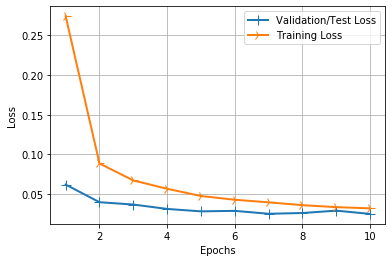

In [5]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

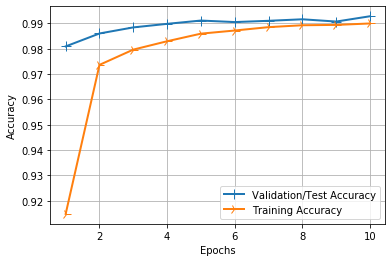

In [7]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

#### Now let's display our Confusion Matrix and Classification Report

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np

y_pred = model.predict_classes(x_test)

print(classification_report(np.argmax(y_test,axis=1), y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      1.00      1.00      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 977    0    0    0    0    0    1    0    1    1]
 [   0 1134    1    0    0    0    0    0    0    0]
 [   1    2 1025    0    0    0    0    4    0    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    0    0  977   

### Displaying our misclassified data

In [9]:
# loads the MNIST dataset
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

# Use numpy to create an array that stores a value of 1 when a misclassification occurs
result = np.absolute(y_test - y_pred)
result_indices = np.nonzero(result > 0)

#  Display the indices of mislassifications
print("Indices of misclassifed data are: \n\n" + str(result_indices))

Indices of misclassifed data are: 

(array([ 321,  445,  449,  582,  659,  947,  965, 1014, 1039, 1226, 1232,
       1242, 1247, 1260, 1364, 1414, 1530, 1621, 1709, 1901, 2035, 2118,
       2130, 2135, 2293, 2462, 2597, 2654, 2896, 2921, 2939, 3030, 3060,
       3073, 3422, 3503, 3520, 3558, 3726, 3727, 3767, 3808, 4163, 4176,
       4601, 4639, 4699, 4731, 4740, 4761, 4807, 4860, 4956, 5937, 5955,
       5997, 6576, 6597, 6625, 6651, 8094, 8408, 9009, 9015, 9019, 9664,
       9679, 9692, 9729, 9770, 9792, 9839]),)


### Displaying the misclassifications

In [15]:
import cv2 
#from keras.models import load_model

#classifier = load_model('/home/deeplearningcv/DeepLearningCV/Trained Models/mnist_simple_cnn.h5')

def draw_test(name, pred, input_im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0]*2 ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    cv2.putText(expanded_image, str(true_label), (250, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,0,255), 2)
    cv2.imshow(name, expanded_image)

for i in range(0,10):

    input_im = x_test[result_indices[0][i]]
    #print(y_test[result_indices[0][i]])
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC) 
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(model.predict_classes(input_im, 1, verbose = 0)[0])
    draw_test("Prediction", res, imageL, y_test[result_indices[0][i]]) 
    cv2.waitKey(0)

cv2.destroyAllWindows()